In [3]:
import cv2 as cv
import matplotlib.pyplot as  plt

im1 = cv.imread('Images/puppy.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im1 is not None

w =13
kernel = np.ones((w,w), np.float32)/(w*w) #function for blurring 
im2 = cv.filter2D(im1, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im1, cmap='gray', vmin=0, vmax =255)
ax[0].set_title('Original')
ax[1].imshow(im2, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Average Filtered')
plt.show() 

NameError: name 'np' is not defined

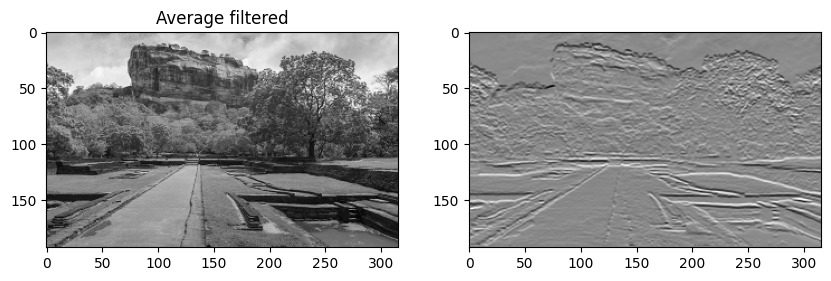

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as  plt
im1 = cv.imread('Images/sigiriya.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im1 is not None

kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
im_x = cv.filter2D(im1.astype('float'), -1, kernel)
im_x = cv.normalize(im_x.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im1,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(im_x, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Average filtered')
plt.show()




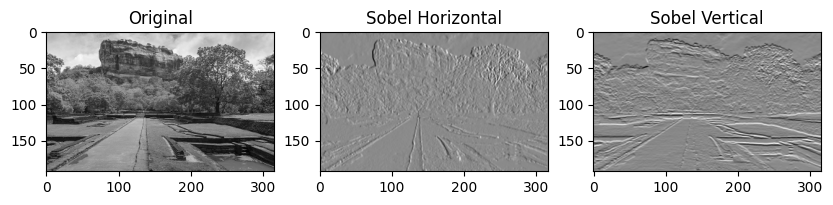

In [39]:
#sobel vertical and horizontal

import cv2 as cv
import numpy as np
import matplotlib.pyplot as  plt
im1 = cv.imread('Images/sigiriya.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im1 is not None

solbel_h  = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
im_x = cv.filter2D(im1.astype('float'), -1, solbel_h)
im_x = cv.normalize(im_x.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

solbel_v  = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
im_y = cv.filter2D(im1.astype('float'), -1, solbel_v)
im_y = cv.normalize(im_y.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

fig, ax = plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im1,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(im_x, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Horizontal')
ax[2].imshow(im_y, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Vertical')
plt.show()





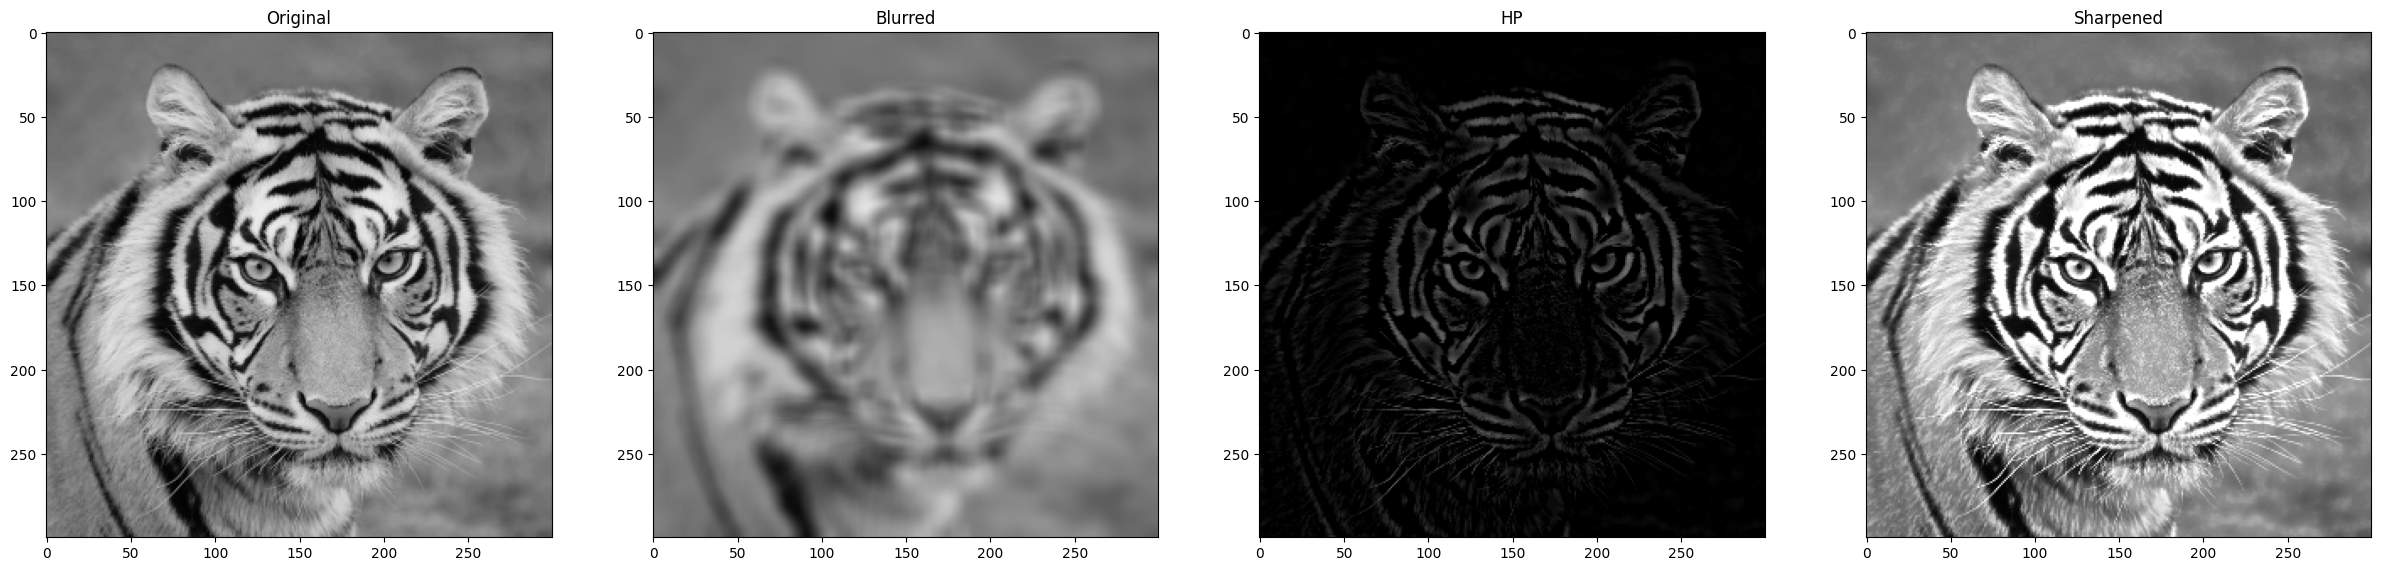

In [34]:
#sharpening

import cv2 as cv
import numpy as np
import matplotlib.pyplot as  plt

im = cv.imread('Images/tiger.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im1 is not None

blurred = cv.blur(im,(11,11))
hp = cv.subtract(im, blurred)
sharpened = cv.addWeighted(im,1.0,hp,1.5,0)

fig, ax = plt.subplots(1,4, figsize=(30,60))
ax[0].imshow(im,cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(blurred, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Blurred')
ax[2].imshow(hp, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('HP')
ax[3].imshow(sharpened, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Sharpened')
plt.show()




(-2.2, 2.2000000000000037, -2.2, 2.2000000000000037)

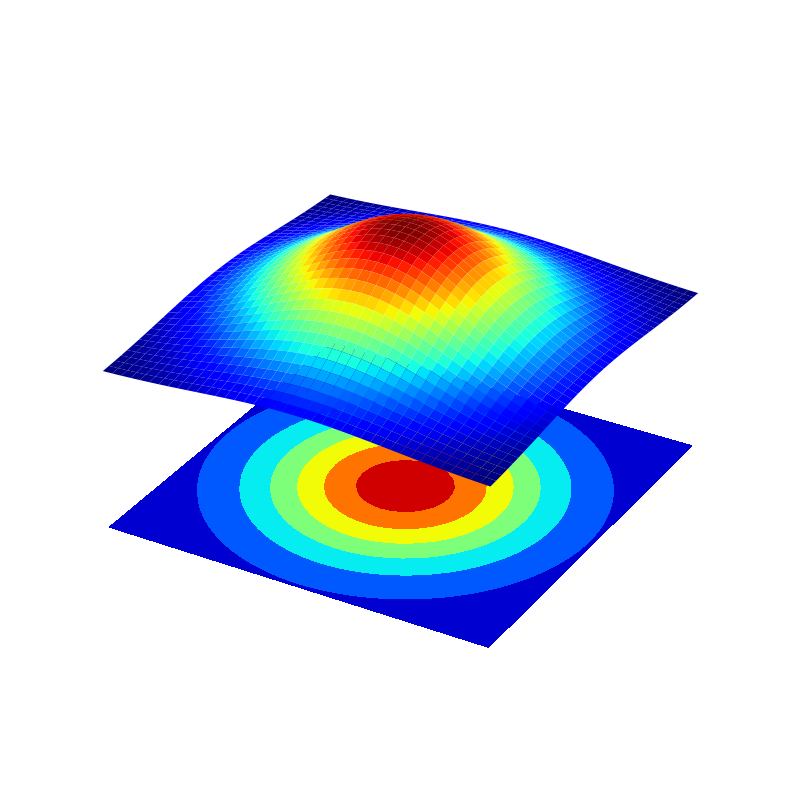

In [42]:
#gaussian kernel

import cv2 as cv
import matplotlib.pyplot as  plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

y, x = np.arange(-2, 2.1, 0.1), np.arange(-2, 2.1, 0.1)
Y, X = np.meshgrid(x,y)
sigma = 1.
g = np.exp(-(X**2 + Y**2)/(2*sigma**2))
#g/=g.sum()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection= '3d')
surf = ax.plot_surface(X, Y, g, cmap=cm.jet, linewidth=0, antialiased=True)
cset = ax.contourf(X, Y, g, zdir='z', offset=np.min(g) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(g) -2, np.max(g))
plt.axis('off')